In [68]:
import pandas as pd

In [69]:
dati = pd.read_csv("dati/diabetes.csv")

In [70]:
dati.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [71]:
dati_sub = dati[["Glucose", "BMI", "Age", "Outcome"]]

In [72]:
dati_sub

,Glucose,BMI,Age,Outcome
0,148,33.6,50,1
1,85,26.6,31,0
2,183,23.3,32,1
3,89,28.1,21,0
4,137,43.1,33,1
...,...,...,...,...
763,101,32.9,63,0
764,122,36.8,27,0
765,121,26.2,30,0
766,126,30.1,47,1


#### Preparo i dati per l'algoritmo di classificazione

In [73]:
X = dati_sub.iloc[:, :-1].values
y = dati_sub.iloc[:, -1].values

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [76]:
X_test.shape

(154, 3)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
logreg = LogisticRegression()

In [79]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [80]:
previsione = logreg.predict(X_test)

In [81]:
import numpy as np

In [82]:
negativo = np.array([[121, 26.2, 30]]) # 0
positivo = np.array([[126, 30.1, 47]]) # 1

In [83]:
logreg.predict(positivo)

array([0], dtype=int64)

In [84]:
previsione

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

#### Calcolo delle misure di performance : acc, cm, p,r, f1 

In [85]:
from sklearn import metrics

In [86]:
acc = metrics.accuracy_score(y_test, previsione)

In [87]:
cm = metrics.confusion_matrix(y_test, previsione)

In [88]:
cm

array([[89, 10],
       [23, 32]], dtype=int64)

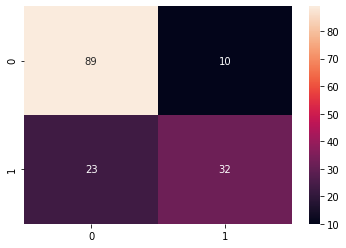

In [89]:
import seaborn as sb
sb.heatmap(cm, annot = True)

In [90]:
TN = cm[0][0]
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

In [91]:
precision = TP / (TP + FP)
precision

0.7619047619047619

In [92]:
metrics.precision_score(y_test, previsione)

0.7619047619047619

In [93]:
recall = TP / (TP + FN)
recall

0.5818181818181818

In [94]:
metrics.recall_score(y_test, previsione)

0.5818181818181818

In [95]:
f1_score = 2*(precision * recall)/ (precision + recall)

In [96]:
f1_score

0.6597938144329897

In [97]:
metrics.f1_score(y_test, previsione)

0.6597938144329897

#### Ottimizzo la precision del mio algoritmo 

In [98]:
logreg.predict(X_test)[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [99]:
logreg.predict_proba(X_test)[:20]

array([[0.5800252 , 0.4199748 ],
       [0.63892819, 0.36107181],
       [0.87673044, 0.12326956],
       [0.91639963, 0.08360037],
       [0.7184608 , 0.2815392 ],
       [0.6703458 , 0.3296542 ],
       [0.66992487, 0.33007513],
       [0.87014601, 0.12985399],
       [0.78665943, 0.21334057],
       [0.72833635, 0.27166365],
       [0.53848187, 0.46151813],
       [0.89427796, 0.10572204],
       [0.04663518, 0.95336482],
       [0.38186431, 0.61813569],
       [0.97586492, 0.02413508],
       [0.27867633, 0.72132367],
       [0.71064674, 0.28935326],
       [0.66512529, 0.33487471],
       [0.93229294, 0.06770706],
       [0.91846117, 0.08153883]])

In [100]:
from sklearn.preprocessing import binarize

In [101]:
probability = logreg.predict_proba(X_test)[:, 1]

In [102]:
probability

array([0.4199748 , 0.36107181, 0.12326956, 0.08360037, 0.2815392 ,
       0.3296542 , 0.33007513, 0.12985399, 0.21334057, 0.27166365,
       0.46151813, 0.10572204, 0.95336482, 0.61813569, 0.02413508,
       0.72132367, 0.28935326, 0.33487471, 0.06770706, 0.08153883,
       0.34510753, 0.08703106, 0.83506815, 0.20434921, 0.08177024,
       0.47317575, 0.3055982 , 0.6214172 , 0.13269334, 0.33174775,
       0.38672676, 0.10805515, 0.06129742, 0.86565703, 0.15580885,
       0.79186147, 0.07186943, 0.20279972, 0.08011204, 0.45785299,
       0.24779183, 0.11627579, 0.04024438, 0.34926217, 0.08295852,
       0.02761531, 0.89683654, 0.83397726, 0.08295457, 0.14094527,
       0.00558238, 0.14857993, 0.77898877, 0.06550415, 0.55734653,
       0.11062553, 0.33567529, 0.24203975, 0.59808238, 0.18062512,
       0.69768545, 0.00764493, 0.68999579, 0.29912019, 0.50583419,
       0.13819534, 0.01437559, 0.50881463, 0.6009527 , 0.58990768,
       0.88538399, 0.84043474, 0.44829709, 0.01846657, 0.64986

In [119]:
y_predicted_bin = binarize([probability], threshold=0.8)[0]
# precision ott. con threshold < 0.5--> 0
# recall ott. con threshold > 0.5 --> 1

In [120]:
y_predicted_bin

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0.])

In [121]:
metrics.precision_score(y_predicted_bin, y_test)

0.23636363636363636

In [122]:
metrics.recall_score(y_predicted_bin, y_test)

0.9285714285714286